In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [2]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [3]:
csv_to_parquet('/Users/parkjubro/Desktop/제주도 자동차/open/train.csv', 'train')
csv_to_parquet('/Users/parkjubro/Desktop/제주도 자동차/open/test.csv', 'test')

train Done.
test Done.


In [4]:
info = pd.read_csv('/Users/parkjubro/Desktop/제주도 자동차/open/data_info.csv')
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')

In [5]:
info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [6]:
info['변수명']

0                        id
1                 base_date
2               day_of_week
3                 base_hour
4               road_in_use
5                lane_count
6               road_rating
7              multi_linked
8              connect_code
9       maximum_speed_limit
10        weight_restricted
11         hight_restricted
12                road_type
13           start_latitude
14          start_longitude
15    start_turn_restricted
16             end_latitude
17            end_longitude
18      end_turn_restricted
19                road_name
20          start_node_name
21            end_node_name
22       vehicle_restricted
23                   target
Name: 변수명, dtype: object

In [7]:
train.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'road_in_use',
       'lane_count', 'road_rating', 'road_name', 'multi_linked',
       'connect_code', 'maximum_speed_limit', 'vehicle_restricted',
       'weight_restricted', 'height_restricted', 'road_type',
       'start_node_name', 'start_latitude', 'start_longitude',
       'start_turn_restricted', 'end_node_name', 'end_latitude',
       'end_longitude', 'end_turn_restricted', 'target'],
      dtype='object')

In [8]:
train

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,0,1,106,지방도1112호선,0,0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,0,2,103,일반국도11호선,0,0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,0,2,103,일반국도16호선,0,0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,0,2,107,태평로,0,0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,0,2,103,일반국도12호선,0,0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,0,1,107,-,0,0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,0,2,107,-,0,0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,0,2,103,일반국도12호선,0,0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,0,2,103,일반국도95호선,0,0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   road_in_use            int64  
 5   lane_count             int64  
 6   road_rating            int64  
 7   road_name              object 
 8   multi_linked           int64  
 9   connect_code           int64  
 10  maximum_speed_limit    float64
 11  vehicle_restricted     float64
 12  weight_restricted      float64
 13  height_restricted      float64
 14  road_type              int64  
 15  start_node_name        object 
 16  start_latitude         float64
 17  start_longitude        float64
 18  start_turn_restricted  object 
 19  end_node_name          object 
 20  end_latitude           float64
 21  end_longitude          float64
 22  end_turn_restricte

In [10]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
road_in_use              0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [11]:
train

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,0,1,106,지방도1112호선,0,0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,0,2,103,일반국도11호선,0,0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,0,2,103,일반국도16호선,0,0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,0,2,107,태평로,0,0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,0,2,103,일반국도12호선,0,0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,0,1,107,-,0,0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,0,2,107,-,0,0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,0,2,103,일반국도12호선,0,0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,0,2,103,일반국도95호선,0,0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [12]:
train['road_in_use'].value_counts()

0    4694812
1       6405
Name: road_in_use, dtype: int64

In [13]:
train['lane_count'].value_counts()

2    2352092
1    1558531
3     790594
Name: lane_count, dtype: int64

In [14]:
train['multi_linked'].value_counts()

0    4698978
1       2239
Name: multi_linked, dtype: int64

In [15]:
train['maximum_speed_limit'].value_counts()

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64

In [16]:
train['road_type'].value_counts()

0    3737117
3     964100
Name: road_type, dtype: int64

In [17]:
train.corr()

,base_date,base_hour,road_in_use,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_date,1.000000,-0.008645,-0.001800,0.011463,0.018547,0.000832,-0.010633,-0.018713,NaN,-0.011030,NaN,-0.004599,-0.016818,-0.004954,-0.016786,-0.004972,-0.033997
base_hour,-0.008645,1.000000,-0.001188,-0.029194,0.031658,0.005711,-0.002649,-0.036756,NaN,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407
road_in_use,-0.001800,-0.001188,1.000000,0.008773,-0.033396,-0.000806,-0.001880,-0.003815,NaN,-0.014873,NaN,-0.018760,-0.027831,0.018197,-0.028571,0.018275,0.026095
lane_count,0.011463,-0.029194,0.008773,1.000000,-0.095717,-0.026555,-0.029290,0.384002,NaN,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256
road_rating,0.018547,0.031658,-0.033396,-0.095717,1.000000,0.024218,-0.054160,-0.327474,NaN,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693
multi_linked,0.000832,0.005711,-0.000806,-0.026555,0.024218,1.000000,-0.001111,-0.020245,NaN,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408
connect_code,-0.010633,-0.002649,-0.001880,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,NaN,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348
maximum_speed_limit,-0.018713,-0.036756,-0.003815,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.011030,-0.003231,-0.014873,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092


<AxesSubplot:>

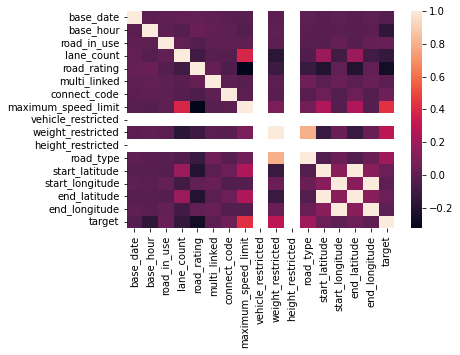

In [18]:
sns.heatmap(train.corr())

In [19]:
train = train.drop(['height_restricted'], axis=1)
test = test.drop(['height_restricted'], axis=1)
# train

In [20]:
train['start_turn_restricted'].value_counts()

없음    4239701
있음     461516
Name: start_turn_restricted, dtype: int64

In [21]:
train['end_turn_restricted'].value_counts()

없음    4239599
있음     461618
Name: end_turn_restricted, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [23]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression # 앙상블 조합용
# from sklearn.neighbors import KNeighborsClassifier # 앙상블 조합용
# from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
y_train = train['target'] 

X_train = train.drop(['id','road_in_use', 'base_date', 'target','road_name', 'start_node_name', 'end_node_name','vehicle_restricted'], axis=1)

test = test.drop(['id', 'road_in_use',  'base_date', 'road_name', 'start_node_name', 'end_node_name','vehicle_restricted'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(test.shape)

(4701217, 15)
(4701217,)
(291241, 15)


In [43]:
X_train,X_test,y_train,y_test = train_test_split(
    X_train,y_train,test_size=0.3,random_state=56
)

In [44]:
from sklearn.ensemble import RandomForestRegressor
import warnings
rfr = RandomForestRegressor(random_state=10)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
mae = mean_absolute_error(pred,y_test)
print(mae)

3.5702190824713336


In [27]:
# from sklearn.model_selection import GridSearchCV
# # parms = {'n_estimators':[],'max_depth':[],'min_samples_split':[],'min_samples_leaf':[]}
# parms = {'n_estimators':list(range(100,150,10)), # num of iter : using classifier
#          'max_depth':list(range(5,11,5)),
#          'min_samples_split':[2],
#          # 'learning_rate': [0.1], # invalid ?
#          'min_samples_leaf':[2]}
# rf_clf = RandomForestRegressor(random_state=0,n_jobs=-1) # n_jobs ?
# grid_cv = GridSearchCV(rf_clf,param_grid=parms,cv=2,n_jobs=-1,)
# grid_cv.fit(X_train,y_train)
# print(grid_cv.best_params_)
# print(round(grid_cv.best_score_,4))

In [28]:
rfr = RandomForestRegressor(random_state=10,max_depth=10,min_samples_leaf=2,min_samples_split=2)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
mae = mean_absolute_error(pred,y_test)
print(mae)

5.219794649363045


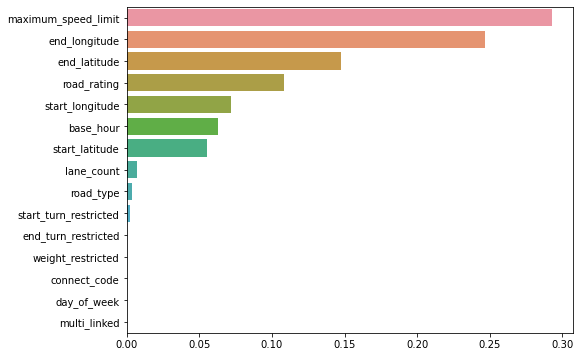

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_rank = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=ftr_rank, y=ftr_rank.index)
plt.show()

In [36]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')

In [37]:
from sklearn.preprocessing import LabelEncoder
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [38]:
y_train2 = train['target'] 

X_train2 = train.drop(['id','road_in_use', 'base_date', 'target','road_name', 'start_node_name', 'end_node_name','vehicle_restricted', 'end_turn_restricted', 'weight_restricted', 'weight_restricted', 'connect_code', 'day_of_week', 'multi_linked'], axis=1)

test2 = test.drop(['id', 'road_in_use',  'base_date', 'road_name', 'start_node_name', 'end_node_name','vehicle_restricted', 'end_turn_restricted', 'weight_restricted', 'weight_restricted', 'connect_code', 'day_of_week', 'multi_linked'], axis=1)

print(X_train2.shape)
print(y_train2.shape)
print(test2.shape)

(4701217, 11)
(4701217,)
(291241, 11)


In [39]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(
    X_train2,y_train2,test_size=0.1,random_state=10
)

In [40]:
from sklearn.ensemble import RandomForestRegressor
import warnings
rfr = RandomForestRegressor(random_state=10)
rfr.fit(X_train2,y_train2)
pred2 = rfr.predict(X_test2)
mae = mean_absolute_error(pred2,y_test2)
print(mae)

3.582868017534121


In [41]:
from sklearn.model_selection import GridSearchCV
# parms = {'n_estimators':[],'max_depth':[],'min_samples_split':[],'min_samples_leaf':[]}
parms = {'n_estimators':list(range(100,150,10)), # num of iter : using classifier
         'max_depth':list(range(5,11,5)),
         'min_samples_split':[2],
         # 'learning_rate': [0.1], # invalid ?
         'min_samples_leaf':[2]}
rf_clf = RandomForestRegressor(random_state=0,n_jobs=-1) # n_jobs ?
grid_cv = GridSearchCV(rf_clf,param_grid=parms,cv=2,n_jobs=-1,)
grid_cv.fit(X_train2,y_train2)
print(grid_cv.best_params_)
print(round(grid_cv.best_score_,4))

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 140}
0.8097


In [42]:
rfr = RandomForestRegressor(random_state=10,max_depth=10,min_samples_leaf=2,min_samples_split=2, n_estimators=140)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
mae = mean_absolute_error(pred,y_test)
print(mae)

5.219777164659164
